In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

raw_data = load_boston()
print(raw_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df["PRICE"] = raw_data.target
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Binning & Smooting

Data içinde bulunan "DIS" değişkeninde Evin Bostondaki iş merkezlerine uzaklığı ağırlıklı olarak hesaplanmış. Bu değişkeni farklı yöntemler kullanarak Ayrıklaştırmak istiyoruz.  

[]

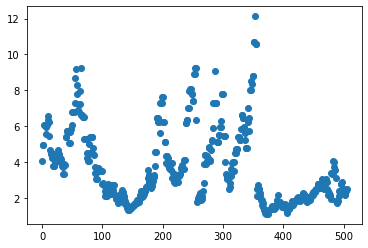

In [4]:
# Bu scatterplotı Ayrıklaştırma işlemi yapıldıktan sonraki hali ile karşılaştırabilirsiniz
DIS = df.DIS
x = np.arange(len(DIS))
plt.scatter(x, DIS)
plt.plot()

### Soru

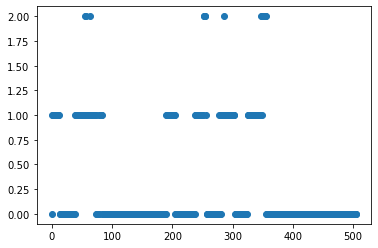

In [5]:
new_DIS, bins = pd.cut(df.DIS, bins=3, retbins=True, labels=[0,1,2]) # y değişkeninin için pd.cut fonksiyonunu kullanarak df.DIS 'ın ayrıklaştırılmış hali ile doldurun 
                # NOT: bins parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.cut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [6]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-width.")

Min: 1.1296 Max: 12.1265
Sınır değerleri: [ 1.1186031   4.79523333  8.46086667 12.1265    ]

 Ayrık değerlerin görülme sayısı
0    365
1    125
2     16
Name: DIS, dtype: int64 


Cevabınızı bu print içine yazabilirsiniz.


### Soru 

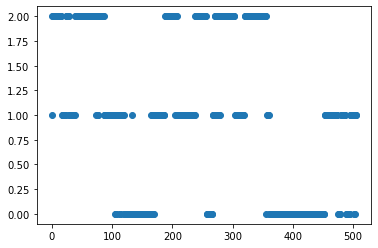

In [8]:
new_DIS, bins = pd.qcut(df.DIS, q=3, retbins=True, labels=[0,1,2]) # aynı işlemi pd.qcut kullanarak yapın
                # NOT: q parametresi için "3", labels için "[0,1,2]" ve retbins için "True" değerlerini kullanın
x = np.arange(len(new_DIS))
plt.scatter(x, new_DIS)

<b>pd.qcut</b> fonksiyonu, değişkeni ayrıklaştırırken aşağıdaki stratejilerden hangisini kullandı?<br>
-- Equal-frequency(Eşit frekans)<br>
-- Equal-width (eşit aralıklar)

IPUCU: değişkenin min-max değerlerini ve value_count dağılımlarını kontrol edebilirsiniz.

In [ ]:
print("Min:", df.DIS.min(),"Max:", df.DIS.max())
print("Sınır değerleri:", bins)
print("\n Ayrık değerlerin görülme sayısı")
print(new_DIS.value_counts(), "\n\n")

print("Equal-frequency.")

# Feature Generation

Bu bölümde var olan değişkenlerden yeni değişkenler üretelim.

In [9]:
# seçtiğiniz iki değişkenin toplamından yeni bir değişken üretin
df["yeniDegisken1"]=df.CRIM+df.INDUS
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,yeniDegisken1
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,2.31632
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.09731
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.09729
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.21237
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.24905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.99263
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.97527
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.99076
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,12.03959


In [13]:
# seçtiğiniz iki değişkenin farkından yeni bir değişken üretin
df["yeniDegisken2"]=df.AGE-df.ZN
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,yeniDegisken1,yeniDegisken3,yeniDegisken2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,2.31632,0.006320,47.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.09731,0.013655,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.09729,0.013645,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.21237,0.010790,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.24905,0.023017,54.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.99263,0.062630,69.1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.97527,0.045270,76.7
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.99076,0.060760,91.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,12.03959,0.109590,89.3


In [16]:
# seçtiğiniz iki değişkenin bölümünden yeni bir değişken üretin
df["yeniDegisken3"]=df.DIS/df.RAD
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,yeniDegisken1,yeniDegisken3,yeniDegisken2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,2.31632,4.090000,47.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.09731,2.483550,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.09729,2.483550,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.21237,2.020733,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.24905,2.020733,54.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.99263,2.478600,69.1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.97527,2.287500,76.7
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.99076,2.167500,91.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,12.03959,2.388900,89.3


In [17]:
# seçtiğiniz iki değişkenin çarpımından yeni bir değişken üretin
df["yeniDegisken4"]=df.NOX*df.AGE
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,yeniDegisken1,yeniDegisken3,yeniDegisken2,yeniDegisken4
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,2.31632,4.090000,47.2,35.0776
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.09731,2.483550,78.9,37.0041
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.09729,2.483550,61.1,28.6559
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.21237,2.020733,45.8,20.9764
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2.24905,2.020733,54.2,24.8236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,11.99263,2.478600,69.1,39.5943
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,11.97527,2.287500,76.7,43.9491
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,11.99076,2.167500,91.0,52.1430
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,12.03959,2.388900,89.3,51.1689


sklearn kütüphanesindeki PolynomialFeatures'ı kullanarak yeni featurelar üretin (NOT:Hedef değişkeni(PRICE) yeni featureları üretirken kullanmayın.)

In [18]:
# PolynomialFeatures kullandığınız python kodunu buraya yazabilirsiniz.
df_newData = df.copy()
df_newData=df.drop("PRICE", axis=1)
from sklearn.preprocessing import PolynomialFeatures
polyFeature = PolynomialFeatures(degree=4, interaction_only=False)
pd.DataFrame(polyFeature.fit_transform(df_newData))

,0,1,2,3,4,5,6,7,8,9,...,5975,5976,5977,5978,5979,5980,5981,5982,5983,5984
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,20582.890272,4.300801e+05,319622.376771,237533.599225,176527.724156,4.963271e+06,3.688552e+06,2.741219e+06,2.037190e+06,1.513978e+06
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,8445.891686,1.219843e+06,572106.339477,268317.873215,125841.082538,3.875324e+07,1.817527e+07,8.524201e+06,3.997850e+06,1.874992e+06
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,5064.935528,5.664956e+05,265686.434897,124606.937967,58440.653906,1.393686e+07,6.536386e+06,3.065565e+06,1.437750e+06,6.743047e+05
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,1796.718018,1.941357e+05,88914.157459,40722.684116,18650.989325,4.400094e+06,2.015243e+06,9.229812e+05,4.227254e+05,1.936082e+05
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,2516.213801,3.217413e+05,147357.533334,67489.750267,30910.305622,8.629729e+06,3.952416e+06,1.810206e+06,8.290745e+05,3.797161e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,...,9631.151831,8.177877e+05,468592.366402,268503.425949,153852.463069,2.279881e+07,1.306372e+07,7.485511e+06,4.289198e+06,2.457710e+06
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,...,10106.997943,1.032160e+06,591427.911556,338888.193322,194182.934773,3.460839e+07,1.983061e+07,1.136294e+07,6.510964e+06,3.730783e+06
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,...,12773.509663,1.633365e+06,935918.226652,536281.143872,307289.095439,6.857496e+07,3.929345e+07,2.251515e+07,1.290118e+07,7.392376e+06
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,...,14941.978343,1.701188e+06,974780.805983,558549.401828,320048.807248,6.359249e+07,3.643850e+07,2.087926e+07,1.196382e+07,6.855266e+06


# Normalizasyon

sklearn kütüphanesindeki Min-max scalerı kullanarak datayı normalize edip yeni bir dataframe içine atayın 

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
minMax = MinMaxScaler(feature_range=(0,1))
df_newData = minMax.fit_transform(df)
pd.DataFrame(df_newData).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.017284,0.440732,0.708448,0.393684
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.062133,0.265608,0.883490,0.416137
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,0.062133,0.265608,0.785202,0.318840
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,0.016309,0.215155,0.700718,0.229336
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.016653,0.215155,0.747101,0.274175


sklearn kütüphanesindeki StandardScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [ ]:
standartScale = StandardScaler()
stdScale = standartScale.fit_transform(df)

sklearn kütüphanesindeki RobustScalerı kullanarak datayı standardize edip yeni bir dataframe içine atayın 

In [21]:
df_robusScale = RobustScaler().fit_transform(df)
pd.DataFrame(df_robusScale)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097,-0.429152,3.250276,-0.463104,-0.165121
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157,-0.158304,1.727207,0.074640,-0.115799
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790,-0.158305,1.727207,-0.227311,-0.329527
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781,-0.435041,1.288412,-0.486853,-0.526135
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,1.880878,-0.432963,1.288412,-0.344360,-0.427640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916,0.150470,0.119021,1.722513,-0.091603,-0.049485
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886,-0.075235,0.118037,1.541332,0.037320,0.062005
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714,0.338558,0.118915,1.427561,0.279898,0.271782
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756,0.100313,0.121681,1.637469,0.251060,0.246844


# Correlation & Covariance

Bu hücrede değişkenlerin birbiri ile olan korelasyonları heatmap kullanarak görselleştirildi.<br>
Aşağıdaki sorular bu görseli incelemeye ve yorumlamaya yönelik olacaktır.


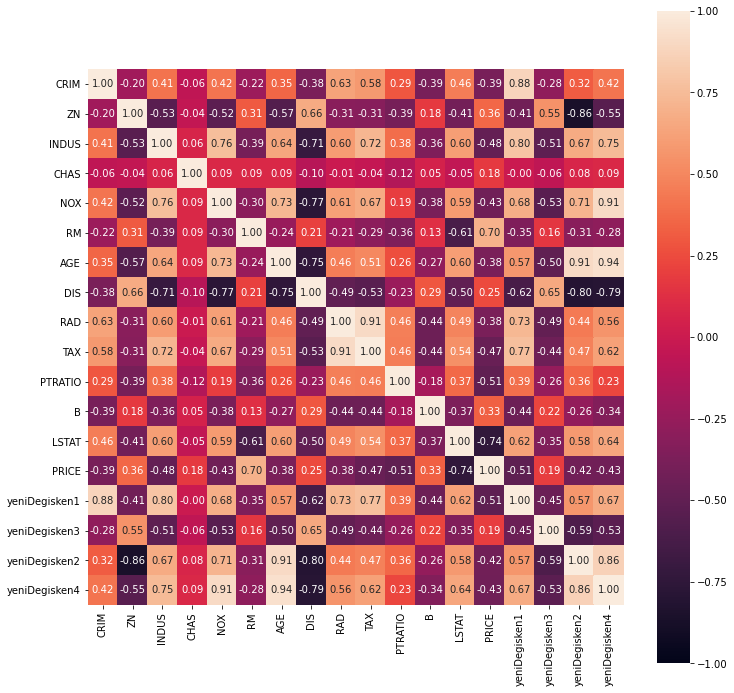

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Aşağıda örnek iki değişken için scatter plot çizilmiştir.

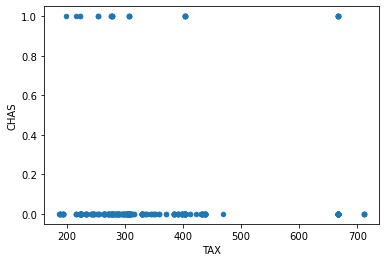

In [23]:
df.plot.scatter("TAX","CHAS")
plt.show()
# scatter plot çizerken buradan kopya çekebilirsiniz :)

Yukarıdaki heatmapten birbiri ile pozitif yüksek korelasyona sahip iki değişken için scatter plot çiziniz. Bir iki cümle ile görseli yorumlamaya çalışınız. Not:Yorum yaparken değişkenlerin yukarıdaki açıklamalarından faydalanabilirsiniz.

In [ ]:
df.plot.scatter("LSTAT","NOX")

print("Bu kısımları kafamda tam oturmadı yorum yapamadım o yüzden en kısa sürede tekrarlayıp çözeceğim")

Heatmapten faydalanarak negatif korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız

In [ ]:
df.plot.scatter("DIS","NOX")

print("Yorumunuzu bu print içine yazabilirsiniz")

Heatmapten faydalanarak düşük korelasyonlu iki değişken için scatter plot çiziniz. Sonucu yorumlayınız.

In [ ]:
df.plot.scatter("CHAS","NOX")

print("Yorumunuzu bu print içine yazabilirsiniz")

### Soru

<b>Adım 1 :</b>df.cov() methodunu kullanarak datasetteki covariance değerlerini hesaplayın.<br> 
sns.heatmap ile bu methodu görselleştirin (IPUCU: Yukarıda korelasyon gösteriminde kullanılan yöntemin aynısı)
heatmap için vmin ve vmax parametrelerini kullanmayın.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,yeniDegisken1,yeniDegisken3,yeniDegisken2,yeniDegisken4
CRIM,73.986578,-40.215956,23.992339,-0.122109,0.419594,-1.325038,85.405322,-6.876722,46.847761,844.821538,5.399331,-302.381816,27.986168,-30.718508,97.978917,-3.136591,125.621278,78.524955
ZN,-40.215956,543.936814,-85.412648,-0.252925,-1.396148,5.112513,-373.901548,32.629304,-63.348695,-1236.453735,-19.776571,373.721402,-68.783037,77.315176,-125.628604,17.060351,-917.838362,-276.890690
INDUS,23.992339,-85.412648,47.064442,0.109669,0.607074,-1.887957,124.513903,-10.228097,35.549971,833.360290,5.692104,-223.579756,29.580270,-30.520823,71.056781,-4.653277,209.926551,111.601808
CHAS,-0.122109,-0.252925,0.109669,0.064513,0.002684,0.016285,0.618571,-0.053043,-0.016296,-1.523367,-0.066819,1.131325,-0.097816,0.409409,-0.012440,-0.018837,0.871496,0.512628
NOX,0.419594,-1.396148,0.607074,0.002684,0.013428,-0.024603,2.385927,-0.187696,0.616929,13.046286,0.047397,-4.020570,0.488946,-0.455412,1.026668,-0.081745,3.782075,2.292189
RM,-1.325038,5.112513,-1.887957,0.016285,-0.024603,0.493671,-4.751929,0.303663,-1.283815,-34.583448,-0.540763,8.215006,-3.079741,4.493446,-3.212994,0.148671,-9.864443,-4.333369
AGE,85.405322,-373.901548,124.513903,0.618571,2.385927,-4.751929,792.358399,-44.329379,111.770846,2402.690122,15.936921,-702.940328,121.077725,-97.589017,209.919225,-18.678172,1166.259947,577.547320
DIS,-6.876722,32.629304,-10.228097,-0.053043,-0.187696,0.303663,-44.329379,4.434015,-9.068252,-189.664592,-1.059775,56.040356,-7.473329,4.840229,-17.104819,1.814266,-76.958684,-36.311118
RAD,46.847761,-63.348695,35.549971,-0.016296,0.616929,-1.283815,111.770846,-9.068252,75.816366,1335.756577,8.760716,-353.276219,30.385442,-30.561228,82.397732,-5.645517,175.119541,106.049947
TAX,844.821538,-1236.453735,833.360290,-1.523367,13.046286,-34.583448,2402.690122,-189.664592,1335.756577,28404.759488,168.153141,-6797.911215,654.714520,-726.255716,1678.181828,-97.207356,3639.143858,2285.735493


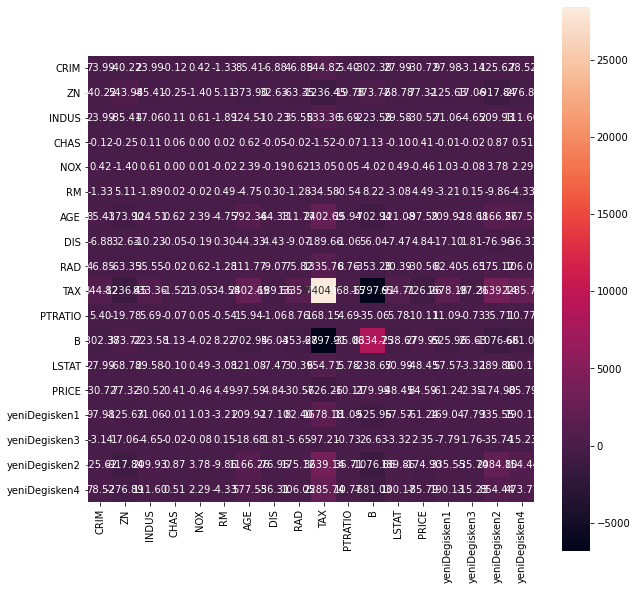

In [27]:
# Heatmap için python kodunu bu hücreye yazın
plt.figure(figsize=(10,10))
display(df.cov())
sns.heatmap(df.cov(), square=True, annot=True, fmt='.2f')
plt.show()

# Bilgi: Kovaryans değerinden anlam çıkartmak korelasyona göre daha zor çıkan grafikten bunu farkedebilirsiniz.

<b>Adım 2 :</b> Şimdi sklearn.preprocessing paketi içindeki StandardScaler objesini kullanarak datayı standardize edin ve bunu ayrı bir dataframede tutun. Standardize edilmiş dataframe objesinin Kovaryans değerini tekrar hesaplatıp görselleştirin.

<br>IPUCU : standardScalerdan gelen dönüştürülmüş datayı tekrar pandas DataFrame objesine çevirin ve bunu yaparken kolon adlarını kaybetmemeye çalışın örn: pd.DataFrame(standardize_numpy_datası, columns=df.columns)

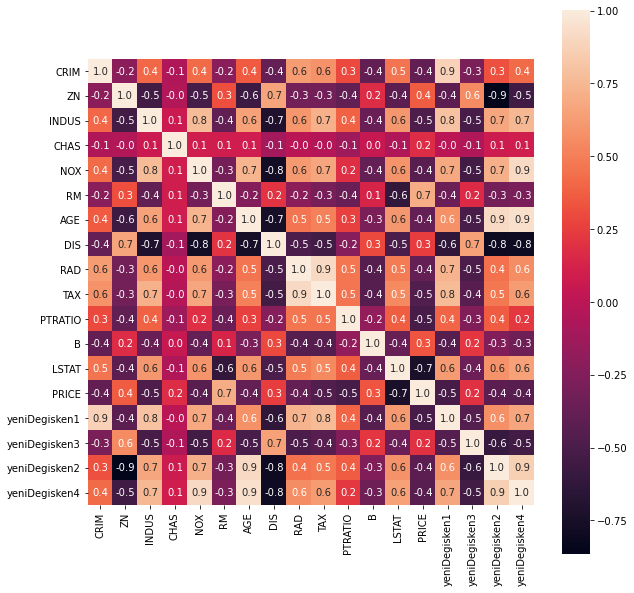

In [28]:
# Heatmap için python kodunu bu hücreye yazın
standartScale = StandardScaler()
df_stdScale = standartScale.fit_transform(df)
df_stdScale = pd.DataFrame(df_stdScale, columns=df.columns)
plt.figure(figsize=(10,10))
sns.heatmap(df_std.cov(), square=True,annot=True, fmt='.1f')

plt.show()

# Bilgi: Ortaya çıkan grafik korelasyon grafiğine benziyor mu? :)